In [ ]:
# load libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# load data
complaint_data = pd.read_csv("../data/ComplaintData.csv")

In [6]:
complaint_data.head(2)

,Date,Complaint Type
0,04/01/2016,Wait time
1,04/01/2016,Wait time


## Define Objective
i.e. Inspect the unique complaints and frequency of complaints

In [7]:
complaints = complaint_data['Complaint Type'].value_counts()

print(complaints)

Complaint Type
Wait time                   68
Not Treated with Respect    56
Lack Information            42
Don't know who to call      29
Hard to get appointment     17
Hours of Operation          15
Cost                        12
Lab Wait                     5
Lack of Privacy              5
Parking Issues               4
Appearance                   4
Other                        3
Employee                     1
Don’t know who to call       1
Name: count, dtype: int64


2nd Objective
- Visualise days people complained about Waiting time

In [8]:
complaint_data['Date'].info

<bound method Series.info of 0      04/01/2016
1      04/01/2016
2      04/01/2016
3      04/01/2016
4      05/01/2016
          ...    
257    31/03/2016
258    31/03/2016
259    31/03/2016
260    31/03/2016
261    31/03/2016
Name: Date, Length: 262, dtype: object>

In [10]:
# Convert 'Date' column to datetime format

"""
Date column (format is object)
The Date format in this data frame is in day-first format (i.e., DD/MM/YYYY)
but pd.to_datetime() is expecting month-first format (MM/DD/YYYY by default in the U.S.).

"""

complaint_data['Date'] = pd.to_datetime(complaint_data['Date'], dayfirst=True)

In [16]:
# Filter complaints related to "Wait time"
wait_complaint = complaint_data[complaint_data['Complaint Type'] == 'Wait time']


In [23]:
# Count complaints per day
complaints_by_day = wait_complaint['Date'].value_counts().sort_index()

In [25]:
complaints_by_day.head

<bound method NDFrame.head of Date
2016-01-04    2
2016-01-07    2
2016-01-08    4
2016-01-11    1
2016-01-12    1
2016-01-13    2
2016-01-14    4
2016-01-15    1
2016-01-22    1
2016-01-26    1
2016-01-28    1
2016-02-02    2
2016-02-03    1
2016-02-05    2
2016-02-11    4
2016-02-16    1
2016-02-17    1
2016-02-25    1
2016-02-26    1
2016-03-01    1
2016-03-03    2
2016-03-04    3
2016-03-07    1
2016-03-08    2
2016-03-10    1
2016-03-11    1
2016-03-15    2
2016-03-16    7
2016-03-17    1
2016-03-22    3
2016-03-25    2
2016-03-28    3
2016-03-29    1
2016-03-30    2
2016-03-31    3
Name: count, dtype: int64>

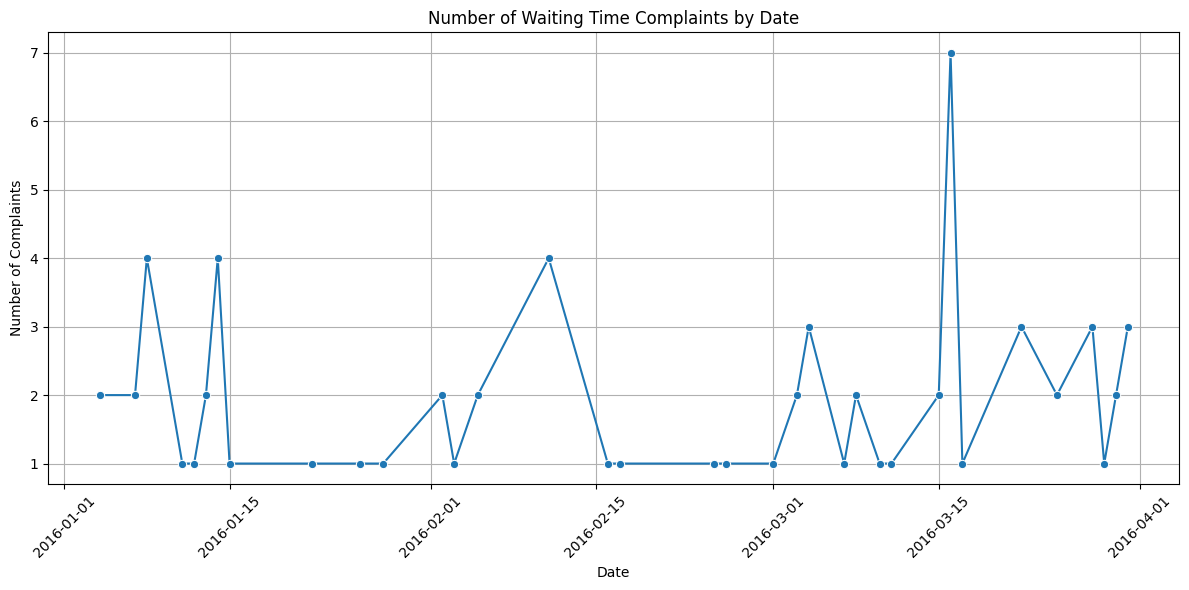

In [34]:
# Plot
plt.figure(figsize=(12, 6))

sns.lineplot(x = complaints_by_day.index,
             y = complaints_by_day.values, marker='o')

plt.title('Number of Waiting Time Complaints by Date')
plt.xlabel('Date')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)

plt.show()